In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/coronavirus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop(columns=['pIC50'])
y = df['pIC50']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature scalling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Initialize the Gradient Boosting regressor

In [12]:
gb = GradientBoostingRegressor(random_state=42)

Define the parameter distribution for Gradient Boosting

In [35]:
gb_param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3)
}

Set up RandomizedSearchCV for Gradient Boosting

In [36]:
gb_random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param_dist,
    n_iter=100,
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

fitting and getting the best estimator

In [37]:

gb_random_search.fit(X_train_scaled, y_train)


best_gb = gb_random_search.best_estimator_

In [38]:
gb_preds_test = best_gb.predict(X_test_scaled)
gb_test_mae = mean_absolute_error(y_test, gb_preds_test)
print(f"Gradient Boosting MAE on test set: {gb_test_mae}")

Gradient Boosting MAE on test set: 0.4564774380300531


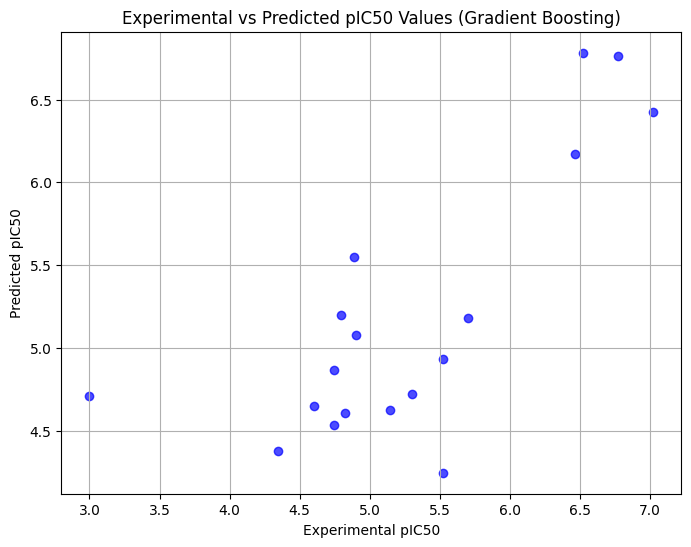

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds_test, color='blue', alpha=0.7)
plt.title('Experimental vs Predicted pIC50 Values (Gradient Boosting)')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.grid(True)
plt.show()